In [98]:
import pathlib
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
from PIL import Image
from torchvision import tv_tensors
import numpy as np
import matplotlib.pyplot as plt
from coco_pretrain import PreTransformer, AffineVideoGenerator
from Loader_17 import normalize
import random
from preprocess_utensils import get_boundary_points, uniform_sample_points
from einops import rearrange, repeat
import torch.optim as optim
from tqdm import tqdm
import glob

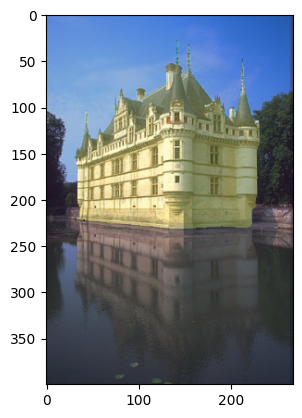

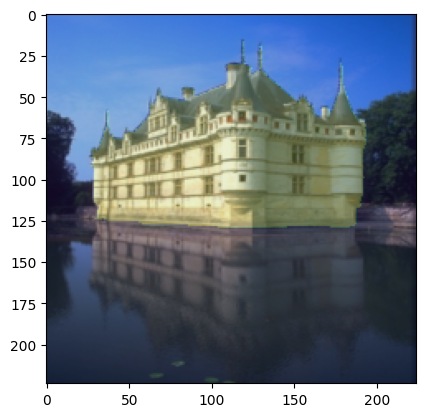

In [37]:
class ECSSD_dataset(Dataset):
    def __init__(self):
        root_path = pathlib.Path('static_image/ecssd')
        self.img_path = root_path / 'images'
        self.mask_path = root_path / 'ground_truth_mask'
        self.names = [p.stem for p in self.img_path.glob('*.jpg')]
        self.names.sort()
    
    def __len__(self):
        return len(self.names)
    
    def __getitem__(self, idx):
        img_path = self.img_path / (self.names[idx] + '.jpg')
        mask_path = self.mask_path / (self.names[idx] + '.png')
        img = Image.open(img_path)
        img = tv_tensors.Image(img)
        mask = Image.open(mask_path)
        mask = tv_tensors.Mask(mask)
        return img, mask

ecssd_dataset = ECSSD_dataset()
img, mask = ecssd_dataset[1]
plt.imshow(img.permute(1, 2, 0))
plt.imshow(mask[0], alpha=0.2)
plt.show()
pre_transformer = PreTransformer()
resized_img, resized_mask = pre_transformer(img, mask)
plt.imshow(normalize(resized_img.permute(1, 2, 0)))
plt.imshow(resized_mask[0], alpha=0.2)
plt.show()

torch.Size([6, 3, 224, 224]) torch.Size([6, 1, 224, 224])


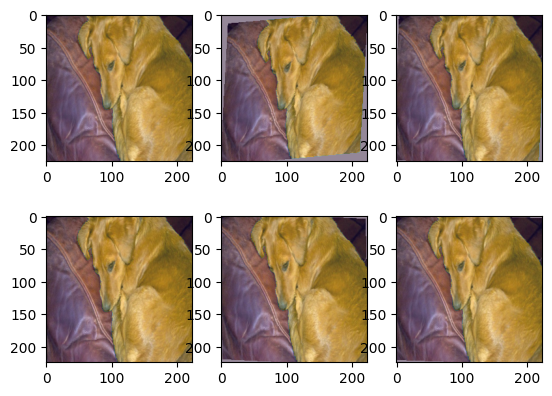

In [53]:
frame_num = 6
video_generator = AffineVideoGenerator(frame_num)
rand_idx = random.randint(0, len(ecssd_dataset) - 1)
img, mask = ecssd_dataset[rand_idx]
mask_idx = 0
resized_img, resized_mask = pre_transformer(img, mask)
imgs, masks = video_generator(resized_img, resized_mask)
print(torch.stack(imgs).shape, torch.stack(masks).shape)
# show all frames
# each line shows 3 frames
for i in range(frame_num):
    plt.subplot((frame_num + 2) // 3, 3, i + 1)
    plt.imshow(normalize(imgs[i].permute(1, 2, 0)))
    plt.imshow(masks[i][mask_idx], alpha=0.2)
    # plt.axis('off')
plt.show()

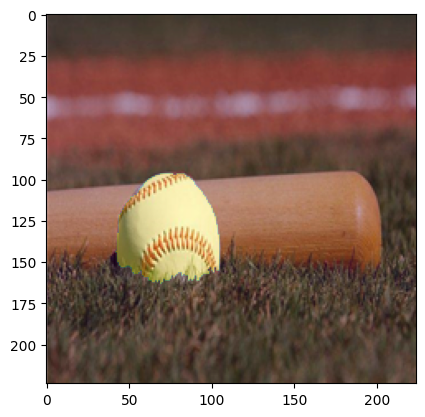

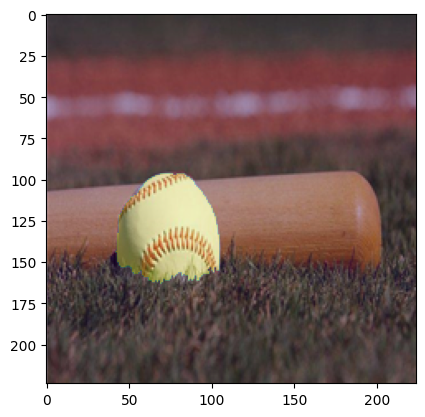

In [115]:
class FSS1000_dataset(Dataset):
    def __init__(self):
        root_path = pathlib.Path('static_image/fss1000')
        # recursive search
        self.img_paths = glob.glob(str(root_path / '**' / '*.jpg'), recursive=True)
        self.img_paths = [pathlib.Path(p) for p in self.img_paths]
        self.img_paths.sort()
        self.mask_paths = [p.parent / (p.stem + '.png') for p in self.img_paths]
        self.mask_paths.sort()
    
    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        mask_path = self.mask_paths[idx]
        img = Image.open(img_path)
        img = tv_tensors.Image(img)
        mask = Image.open(mask_path)
        mask = tv_tensors.Mask(mask)
        return img, mask
fss_dataset = FSS1000_dataset()
img, mask = fss_dataset[666]
plt.imshow(img.permute(1, 2, 0))
plt.imshow(mask[0], alpha=0.3)
plt.show()
pre_transformer = PreTransformer()
resized_img, resized_mask = pre_transformer(img, mask)
plt.imshow(normalize(resized_img.permute(1, 2, 0)))
plt.imshow(resized_mask[0], alpha=0.3)
plt.show()

135


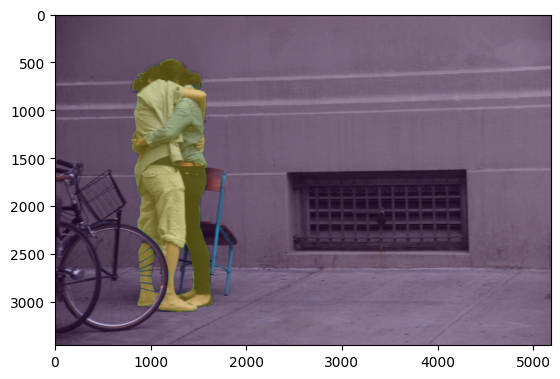

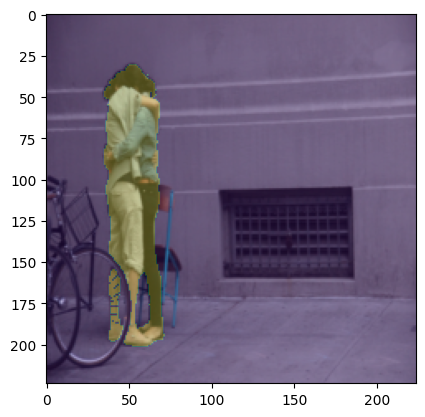

In [136]:
class HRSOD_dataset(Dataset):
    def __init__(self):
        root_path = pathlib.Path('static_image/hrsod')
        self.img_paths = glob.glob(str(root_path / '**' / '*.jpg'), recursive=True)
        self.img_paths = [pathlib.Path(p) for p in self.img_paths]
        self.img_paths.sort()
        self.mask_paths = glob.glob(str(root_path / '**' / '*.png'), recursive=True)
        self.mask_paths = [pathlib.Path(p) for p in self.mask_paths]
        self.mask_paths.sort()

    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        mask_path = self.mask_paths[idx]
        img = Image.open(img_path)
        img = tv_tensors.Image(img)
        mask = Image.open(mask_path)
        mask = tv_tensors.Mask(mask)
        return img, mask
hrsod_dataset = HRSOD_dataset()
rand_idx = random.randint(0, len(hrsod_dataset) - 1)
print(rand_idx)
img, mask = hrsod_dataset[rand_idx]
plt.imshow(img.permute(1, 2, 0))
plt.imshow(mask[0], alpha=0.3)
plt.show()
pre_transformer = PreTransformer()
resized_img, resized_mask = pre_transformer(img, mask)
plt.imshow(normalize(resized_img.permute(1, 2, 0)))
plt.imshow(resized_mask[0], alpha=0.3)
plt.show()

40


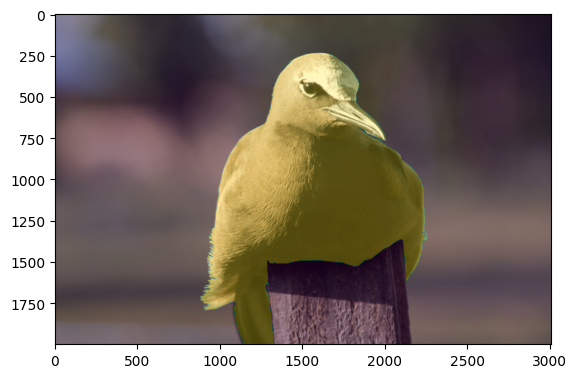

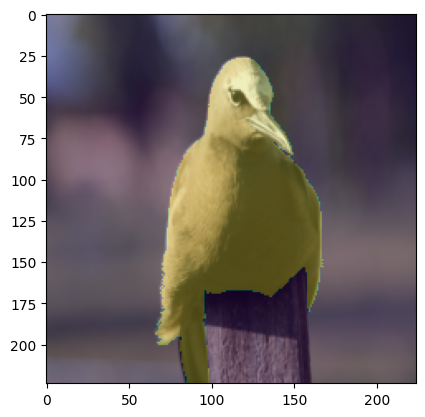

In [171]:
class BIG_dataset(Dataset):
    def __init__(self):
        root_path = pathlib.Path('static_image/big')
        self.img_paths = glob.glob(str(root_path / '**' / '*.jpg'), recursive=True)
        self.img_paths = [pathlib.Path(p) for p in self.img_paths]
        self.img_paths.sort()
        self.mask_paths = glob.glob(str(root_path / '**' / '*.png'), recursive=True)
        self.mask_paths = [pathlib.Path(p) for p in self.mask_paths]
        self.mask_paths.sort()

    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        mask_path = self.mask_paths[idx]
        img = Image.open(img_path)
        img = tv_tensors.Image(img)
        mask = Image.open(mask_path)
        mask = tv_tensors.Mask(mask)
        return img, mask
big_dataset = BIG_dataset()
rand_idx = random.randint(0, len(big_dataset) - 1)
print(rand_idx)
img, mask = big_dataset[rand_idx]
plt.imshow(img.permute(1, 2, 0))
plt.imshow(mask[0], alpha=0.3)
plt.show()
pre_transformer = PreTransformer()
resized_img, resized_mask = pre_transformer(img, mask)
plt.imshow(normalize(resized_img.permute(1, 2, 0)))
plt.imshow(resized_mask[0], alpha=0.3)
plt.show()

12932


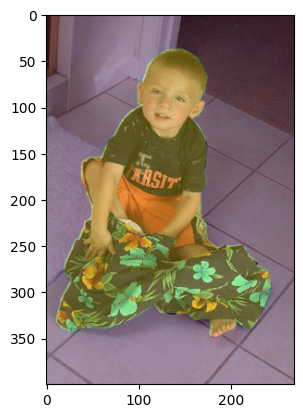

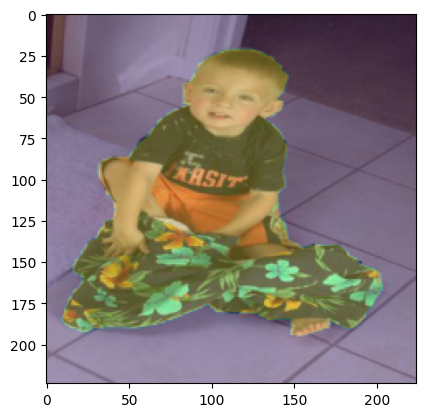

In [205]:
class DUTS_dataset(Dataset):
    def __init__(self):
        root_path = pathlib.Path('static_image/duts')
        self.img_paths = glob.glob(str(root_path / '**' / '*.jpg'), recursive=True)
        self.img_paths = [pathlib.Path(p) for p in self.img_paths]
        self.img_paths.sort()
        self.mask_paths = glob.glob(str(root_path / '**' / '*.png'), recursive=True)
        self.mask_paths = [pathlib.Path(p) for p in self.mask_paths]
        self.mask_paths.sort()

    def __len__(self):
        return len(self.img_paths)
    
    def __getitem__(self, idx):
        img_path = self.img_paths[idx]
        mask_path = self.mask_paths[idx]
        img = Image.open(img_path)
        img = tv_tensors.Image(img)
        mask = Image.open(mask_path)
        mask = tv_tensors.Mask(mask)
        return img, mask
    
duts_dataset = DUTS_dataset()
rand_idx = random.randint(0, len(duts_dataset) - 1)
print(rand_idx)
img, mask = duts_dataset[rand_idx]
plt.imshow(img.permute(1, 2, 0))
plt.imshow(mask[0], alpha=0.3)
plt.show()
pre_transformer = PreTransformer()
resized_img, resized_mask = pre_transformer(img, mask)
plt.imshow(normalize(resized_img.permute(1, 2, 0)))
plt.imshow(resized_mask[0], alpha=0.3)
plt.show()

In [243]:
class StaticVideoDataset(Dataset):
    def __init__(
        self,
        dataset_list: list[Dataset],
        frame_num: int,
        point_num: int,
    ):
        super().__init__()
        self.dataset_list = dataset_list
        self.pre_transformer = PreTransformer()
        self.video_generator = AffineVideoGenerator(frame_num)
        self.frame_num = frame_num
        self.point_num = point_num

    def __len__(self):
        return len(self.dataset_list)

    def __getitem__(self, idx) -> tuple[torch.Tensor, torch.Tensor, torch.Tensor]:
        dataset = self.dataset_list[idx]

        def _get_new_idx():
            return random.randint(0, len(dataset) - 1)

        def _get_boundary_points(mask: torch.Tensor) -> torch.Tensor:
            boundary = get_boundary_points(mask.numpy())
            boundary = uniform_sample_points(boundary, self.point_num)
            boundary = torch.tensor(boundary, dtype=torch.float32)
            return boundary

        while True:
            idx = _get_new_idx()
            img, mask = dataset[idx]
            resized_img, resized_mask = self.pre_transformer(img, mask)
            imgs, masks = self.video_generator(resized_img, resized_mask)
            imgs = torch.stack(imgs)
            masks = torch.stack(masks)
            masks = masks[:, 0]
            masks[masks != 0] = 1
            if all([m.sum() > 0 for m in masks]):
                points = [_get_boundary_points(m) for m in masks]
                if all([p.shape == (self.point_num, 2) for p in points]):
                    points = torch.stack(points)
                    break
        return imgs, masks, points


point_num = 16
dataset_list = []
dataset_list.append(ecssd_dataset)
dataset_list.append(fss_dataset)
for i in range(5):
    dataset_list.append(hrsod_dataset)
for i in range(5):
    dataset_list.append(big_dataset)
dataset_list.append(duts_dataset)
static_video_dataset = StaticVideoDataset(
    dataset_list,
    frame_num,
    point_num,
)
static_video_loader = DataLoader(static_video_dataset, batch_size=1, shuffle=False, num_workers=4)
imgs, masks, points = next(iter(static_video_loader))
print(imgs.shape, masks.shape, points.shape)

torch.Size([1, 6, 3, 224, 224]) torch.Size([1, 6, 224, 224]) torch.Size([1, 6, 16, 2])


In [223]:
total_dataset_size = sum([len(d) for d in static_video_dataset.dataset_list])
print(total_dataset_size)

28732


6


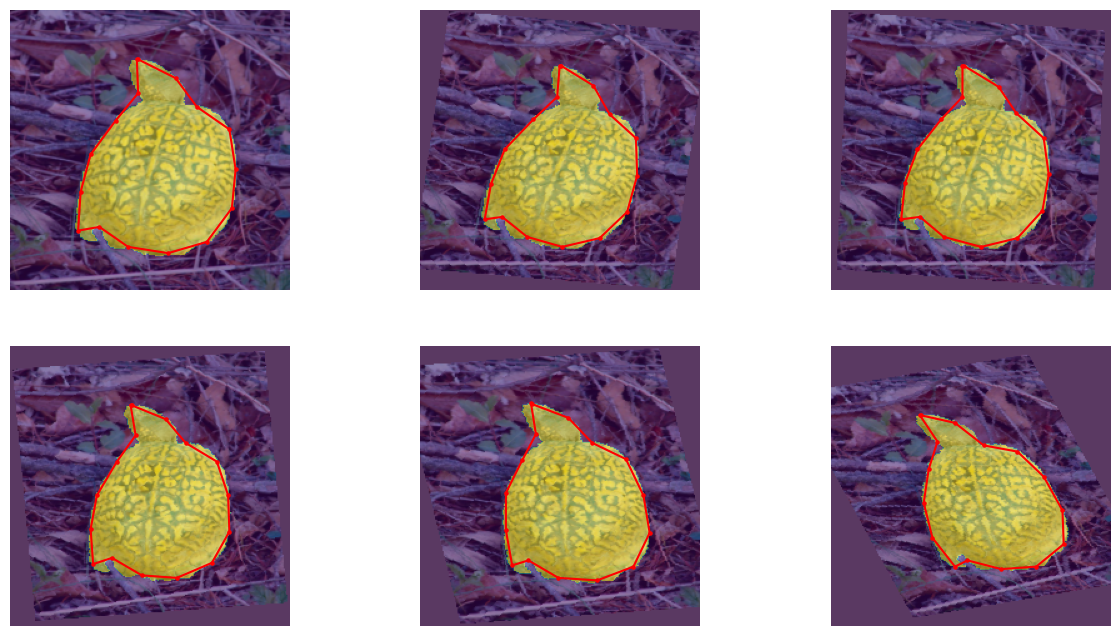

In [225]:
# show all frames in the video and the polygon
frame_num = imgs.shape[1]
print(frame_num)
fig, axes = plt.subplots(frame_num // 3, 3, figsize=(15, 4 * (frame_num // 3)))
for i in range(frame_num):
    ax = axes[i // 3, i % 3]
    ax.imshow(normalize(imgs[0, i]).permute(1, 2, 0))
    ax.imshow(masks[0, i], alpha=0.5)
    ax.plot(points[0, i, :, 0], points[0, i, :, 1], c="r")
    ax.scatter(points[0, i, :, 0], points[0, i, :, 1], c="r", s=5)
    ax.axis("off")
plt.show()

In [226]:
from cotracker import CotrackerLight, VideoLoss
from polygon import RasLoss, SoftPolygon

In [227]:
model = CotrackerLight(point_num).cuda()

Using cache found in /zhome/32/f/202284/.cache/torch/hub/mhamilton723_FeatUp_main
Using cache found in /zhome/32/f/202284/.cache/torch/hub/facebookresearch_dino_main


In [228]:
optimizer = optim.Adam(model.parameters(), lr=1e-4)

In [233]:
epoch_num = 20

In [234]:
gt_rasterizer = SoftPolygon(1, "hard_mask").cuda()
ras_loss = RasLoss().cuda()
video_loss = VideoLoss(ras_loss, gt_rasterizer).cuda()

In [240]:
for e in range(epoch_num):
    model.train()
    total_loss = 0
    total_iou = 0
    for imgs, masks, points in tqdm(static_video_loader):
        imgs = imgs.cuda()
        masks = masks.cuda()
        points = points.cuda()
        optimizer.zero_grad()
        fir_point = points[:, 0]
        init_points = repeat(fir_point, "b n p -> b f n p", f=frame_num)
        pred_points = model(imgs.cuda(), init_points.cuda())
        target_masks = masks[:, 1:]
        loss, iou = video_loss(pred_points, target_masks.cuda())
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_iou += iou.item()
    total_iou /= len(static_video_dataset)
    total_loss /= len(static_video_dataset)
    print(f"Epoch {e}, Loss: {total_loss:.4f}, IoU: {total_iou:.4f}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:08<00:00,  1.47it/s]


Epoch 0, Loss: 0.3316, IoU: 0.5292


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.77it/s]


Epoch 1, Loss: 0.2618, IoU: 0.6033


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.81it/s]


Epoch 2, Loss: 0.2020, IoU: 0.6831


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:06<00:00,  2.12it/s]


Epoch 3, Loss: 0.2232, IoU: 0.6475


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:08<00:00,  1.62it/s]


Epoch 4, Loss: 0.3031, IoU: 0.5645


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:05<00:00,  2.18it/s]


Epoch 5, Loss: 0.2040, IoU: 0.6773


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:05<00:00,  2.34it/s]


Epoch 6, Loss: 0.2379, IoU: 0.6335


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:06<00:00,  1.87it/s]


Epoch 7, Loss: 0.2960, IoU: 0.5809


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:08<00:00,  1.53it/s]


Epoch 8, Loss: 0.3296, IoU: 0.5527


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.73it/s]


Epoch 9, Loss: 0.2402, IoU: 0.6457


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.68it/s]


Epoch 10, Loss: 0.2794, IoU: 0.5863


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:05<00:00,  2.26it/s]


Epoch 11, Loss: 0.2559, IoU: 0.6107


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:06<00:00,  1.88it/s]


Epoch 12, Loss: 0.2234, IoU: 0.6570


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:05<00:00,  2.58it/s]


Epoch 13, Loss: 0.2461, IoU: 0.6207


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:07<00:00,  1.71it/s]


Epoch 14, Loss: 0.3618, IoU: 0.5131


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:05<00:00,  2.25it/s]


Epoch 15, Loss: 0.2643, IoU: 0.6077


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:06<00:00,  2.15it/s]


Epoch 16, Loss: 0.2387, IoU: 0.6341


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:06<00:00,  2.03it/s]


Epoch 17, Loss: 0.2066, IoU: 0.6710


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:05<00:00,  2.35it/s]


Epoch 18, Loss: 0.3300, IoU: 0.5302


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:06<00:00,  1.90it/s]

Epoch 19, Loss: 0.2995, IoU: 0.5864


In [247]:
for i in tqdm(range(100)):
    for imgs, masks, points in static_video_loader:
        pass

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 100/100 [03:05<00:00,  1.86s/it]
